In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T # Ma tan cot, shape: (13, 1)
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T # Ma tan cot, shape: (13, 1)

# Visualize data 

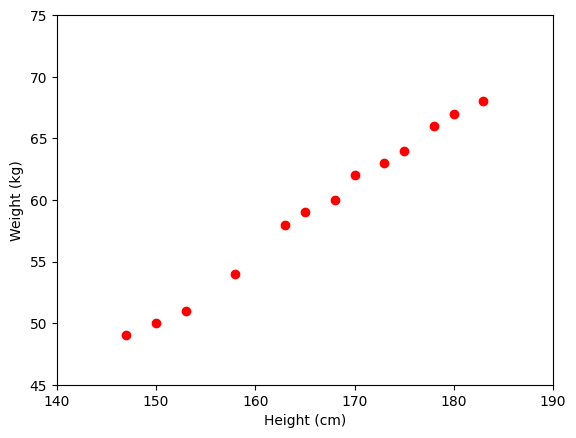

In [5]:
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75]) # plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Building Xbar 

In [6]:
one = np.ones((X.shape[0], 1)) # Ma tran cot toan so 1 (shape: (13, 1))
Xbar = np.concatenate((one, X), axis = 1) # concatenate: ghep 2 ma tran, axis = 1: ghep theo cot(noi ngang) (shape: (13, 2))

# Calculating weights of the fitting line 

In [7]:
A = np.dot(Xbar.T, Xbar) # shape: (2, 2)
b = np.dot(Xbar.T, y) # shape: (2, 1)
A_dagger = np.linalg.pinv(A) # pseudo inverse(gia nghich dao) # shape: (2, 2)
w = np.dot(A_dagger, b) # shape: (2, 1): [w_0, w_1]^T
print('w = ', w) # w = [w_0(bias), w_1]

w =  [[-33.73541021]
 [  0.55920496]]


# Preparing the fitting line 

In [ ]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0


<class 'numpy.ndarray'>


# Drawing the fitting line 

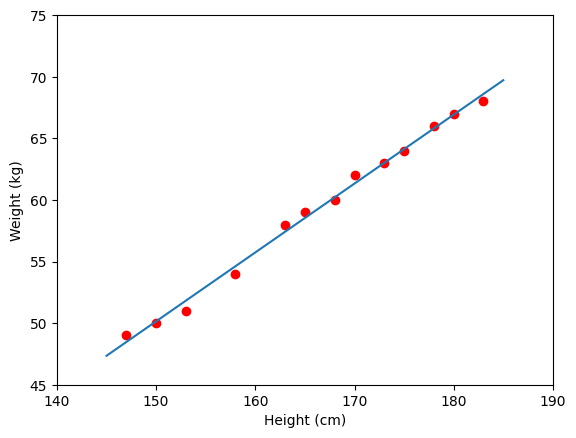

In [9]:
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [10]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


# Compare with sklearn

In [16]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
